# Lab Assignment: Lab 4: Regression Analysis with Regularization Techniques

Name: Rachna Bhattarai

Date: June 7, 2025


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes # For loading the dataset 
from sklearn.model_selection import train_test_split # For splitting data 
from sklearn.linear_model import LinearRegression, Ridge, Lasso # For regression models 
from sklearn.preprocessing import PolynomialFeatures # For polynomial features 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # For evaluation metrics 

Step 1: Data Preparation

In [ ]:
# Load the Diabetes dataset 
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Explore the dataset (features, target values, data distribution)
print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())
print("\nDescription of features:")
print(X.describe())
print("\nDescription of target:")
print(y.describe())
print("\nMissing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())

# No explicit missing value handling needed for this dataset as per typical usage,


Features (X) head:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Target (y) head:
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64

Description of features:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797

Step 2: Linear Regression 


--- Simple Linear Regression Metrics ---
MAE: 52.26
MSE: 4061.83
RMSE: 63.73
R-squared: 0.23


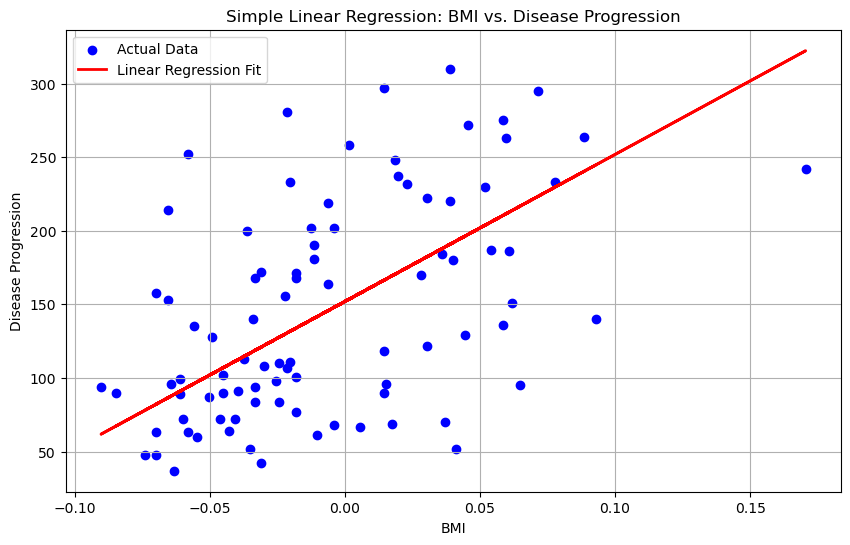

In [ ]:
# Choose one feature for Simple Linear Regression (e.g., 'bmi') 
X_simple = X[['bmi']]

# Split the data into training and testing sets 
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Implement and train the Linear Regression model 
linear_model = LinearRegression()
linear_model.fit(X_train_simple, y_train_simple)

# Make predictions
y_pred_simple = linear_model.predict(X_test_simple)

# Evaluate the model's performance 
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print(f"\n--- Simple Linear Regression Metrics ---")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"RMSE: {rmse_simple:.2f}")
print(f"R-squared: {r2_simple:.2f}")

# Visualize the model's predictions 
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Data')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Linear Regression Fit')
plt.title('Simple Linear Regression: BMI vs. Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.show()

Step 3: Multiple Regression


--- Multiple Regression Metrics ---
MAE: 42.79
MSE: 2900.19
RMSE: 53.85
R-squared: 0.45


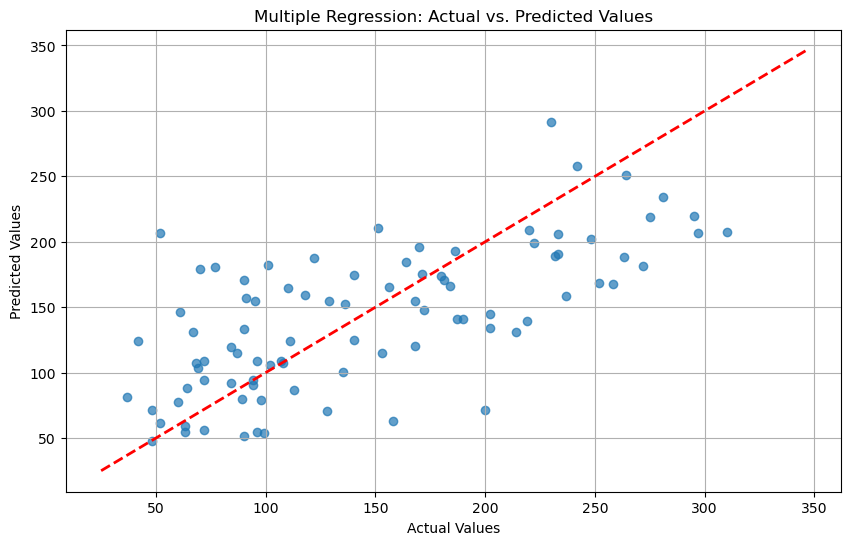

In [ ]:
# Split the data into training and testing sets (using all features) 
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement and train the Multiple Regression model 
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = multi_linear_model.predict(X_test_multi)

# Evaluate the model's performance 
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"\n--- Multiple Regression Metrics ---")
print(f"MAE: {mae_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")
print(f"R-squared: {r2_multi:.2f}")

# Visualize predicted vs actual values 
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Regression: Actual vs. Predicted Values')
plt.grid(True)
plt.show()

Step 4: Polynomial Regression

In [ ]:
# Choose a degree for polynomial features (start with 2, then experiment) 
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X) # Transform all features to polynomial features

# Split the data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Implement and train the Polynomial Regression model [cite: 17]
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model's performance [cite: 17]
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"\n--- Polynomial Regression (Degree {degree}) Metrics ---")
print(f"MAE: {mae_poly:.2f}")
print(f"MSE: {mse_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")




--- Polynomial Regression (Degree 2) Metrics ---
MAE: 43.58
MSE: 3096.03
RMSE: 55.64
R-squared: 0.42


Step 5: Regularization with Ridge and Lasso Regression 




--- Ridge Regression Metrics ---

Alpha: 0.1
MAE: 43.00
MSE: 2856.49
RMSE: 53.45
R-squared: 0.46

Alpha: 1.0
MAE: 46.14
MSE: 3077.42
RMSE: 55.47
R-squared: 0.42

Alpha: 10.0
MAE: 58.03
MSE: 4443.95
RMSE: 66.66
R-squared: 0.16

--- Lasso Regression Metrics ---

Alpha: 0.1
MAE: 42.85
MSE: 2798.19
RMSE: 52.90
R-squared: 0.47

Alpha: 1.0
MAE: 49.73
MSE: 3403.58
RMSE: 58.34
R-squared: 0.36

Alpha: 10.0
MAE: 64.01
MSE: 5361.53
RMSE: 73.22
R-squared: -0.01


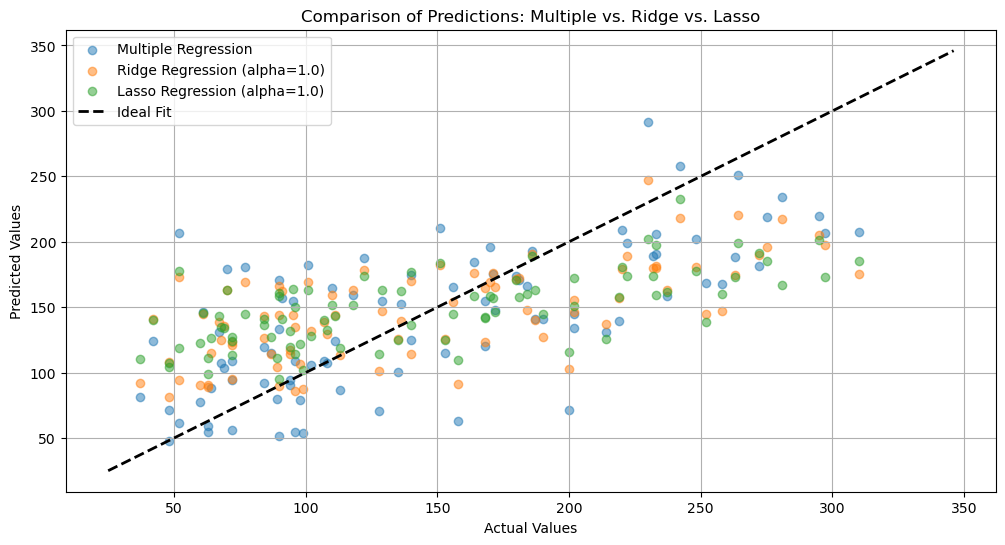

In [6]:
# Using the full dataset (X, y) and train/test split from Multiple Regression for consistency
# X_train_multi, X_test_multi, y_train_multi, y_test_multi

# Implement Ridge Regression 
# Experiment with different alpha values [cite: 21]
alphas = [0.1, 1.0, 10.0] # Example alpha values
ridge_results = {}

print("\n--- Ridge Regression Metrics ---")
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_multi, y_train_multi)
    y_pred_ridge = ridge_model.predict(X_test_multi)

    mae_ridge = mean_absolute_error(y_test_multi, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test_multi, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(y_test_multi, y_pred_ridge)

    ridge_results[alpha] = {'MAE': mae_ridge, 'MSE': mse_ridge, 'RMSE': rmse_ridge, 'R2': r2_ridge}

    print(f"\nAlpha: {alpha}")
    print(f"MAE: {mae_ridge:.2f}")
    print(f"MSE: {mse_ridge:.2f}")
    print(f"RMSE: {rmse_ridge:.2f}")
    print(f"R-squared: {r2_ridge:.2f}")

# Implement Lasso Regression 
lasso_results = {}

print("\n--- Lasso Regression Metrics ---")
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_multi, y_train_multi)
    y_pred_lasso = lasso_model.predict(X_test_multi)

    mae_lasso = mean_absolute_error(y_test_multi, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test_multi, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    r2_lasso = r2_score(y_test_multi, y_pred_lasso)

    lasso_results[alpha] = {'MAE': mae_lasso, 'MSE': mse_lasso, 'RMSE': rmse_lasso, 'R2': r2_lasso}

    print(f"\nAlpha: {alpha}")
    print(f"MAE: {mae_lasso:.2f}")
    print(f"MSE: {mse_lasso:.2f}")
    print(f"RMSE: {rmse_lasso:.2f}")
    print(f"R-squared: {r2_lasso:.2f}")
    
    # Observe coefficients to see Lasso's feature selection [cite: 21]
    # print(f"Lasso Coefficients (alpha={alpha}):")
    # print(lasso_model.coef_) # You'll see some coefficients become exactly zero with Lasso

# Visualize predictions and highlight differences [cite: 22]
# This can be done by plotting actual vs. predicted for a chosen alpha,
# or by comparing distributions of residuals.
plt.figure(figsize=(12, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.5, label='Multiple Regression')
plt.scatter(y_test_multi, Ridge(alpha=1.0).fit(X_train_multi, y_train_multi).predict(X_test_multi), alpha=0.5, label='Ridge Regression (alpha=1.0)')
plt.scatter(y_test_multi, Lasso(alpha=1.0).fit(X_train_multi, y_train_multi).predict(X_test_multi), alpha=0.5, label='Lasso Regression (alpha=1.0)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions: Multiple vs. Ridge vs. Lasso')
plt.legend()
plt.grid(True)
plt.show()

# Explanation of alpha values[cite: 21]:
# In your Markdown cells, discuss how:
# - Increasing alpha in Ridge Regression shrinks coefficients towards zero but rarely to exactly zero, reducing variance.
# - Increasing alpha in Lasso Regression shrinks coefficients towards zero and can set some exactly to zero, performing feature selection and reducing complexity.

# Step 6: Model Comparison and Analysis

Several regression models were implemented and compared to see their performance in the prediction of diabetes progression with the Diabetes dataset in this lab. The SLR model with only BMI as a predictor was the worst with R² of a mere 0.23, showing poor fit and little predicting power. As opposed to the above, only resorted to a selection of predictive features, Multiple Linear Regression (which included all features) enhanced the performance markedly with an R² of 0.45 and a lower MAE, reinforcing the need for including various predictors.

Polynomial Regression with degree = 2 was not significantly better than the linear model with R² of 0.42, which indicated that adding complexity only through polynomials slightly overtuned the model without generalizing better.
Ridge Regression showed that with a small alpha value (α = 0.1), performance slightly improved (R² = 0.46), but higher alpha values (e.g., α = 10.0) resulted in performance degradation (R² = 0.16), indicating that too much regularization can harm the model. Lasso Regression with α = 0.1 achieved the best overall performance (R² = 0.47), and due to its nature, it likely reduced model complexity by eliminating less relevant features. However, like Ridge, Lasso also performed poorly at α = 10.0 with an R² of -0.01, showing signs of underfitting.